# Mushroom Classification

## Domain - Agriculture

### Author - Prodip Sarkar



### Problem Statement :

The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.



In [100]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle


In [2]:
# read the data
mushroom= pd.read_csv('/Users/hackthebox/Downloads/Mushroom_Classifiaction_Final/Data/mushrooms.csv')

In [3]:
# show first five records from the data
mushroom.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Dataset Information: Meaning of different values in different columns.

#### Attribute Information:

classes: edible=e, poisonous=p

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cayey=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


In [4]:
# dimension of the data
mushroom.shape

(8124, 23)

As you can see that there are 8124 rows and 23 columns in this data.



In [5]:
# datatypes present in our data
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

From above information, we can see that all our data is categorical.


In [6]:
# Descriptive statistics of the data
mushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
# Concise summary of the data
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# Lets check how many classes are present in the target column
mushroom['class'].unique()

array(['p', 'e'], dtype=object)


Here we can see that there are two classes present in our target column which are:

'p' - poisonous and 

'e' - edible.

In [9]:
# Now we will check the counts of classes present in the target column
mushroom['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64


From above table we can see that our data is almost balanced as there are almost equal number of 'p' and 'e' classes.

In [10]:
# Check for the null / missing values in our data
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


As we can see that there no missing/null values in the dataset. However, if you go through the data description you will find that the missing values in one column is replaced with "?". We need to handle this missing values.

In [11]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]== '?'].count()
    if missing != 0:
        print(f'{i} has {missing} missing values')

stalk-root has 2480 missing values



There are 2480 missing values in 'stalk-root' column. First we will replace this values with np.nan so that we can handle missing data.

In [12]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?',value=np.nan)


In [13]:
# Lets check for missing values again
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now we will impute the missing values in 'stalk-root' column using sklearn SimpleImputer


In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(mushroom[['stalk-root']])


SimpleImputer(strategy='most_frequent')

In [15]:
mushroom['stalk-root'] = imputer.transform(mushroom[['stalk-root']].values.reshape(-1, 1)).flatten()

/Users/hackthebox/Downloads/Mushroom_Classifiaction_Final/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [16]:
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(f'{i} has {mushroom[i].nunique()} unique values')

class has 2 unique values
cap-shape has 6 unique values
cap-surface has 4 unique values
cap-color has 10 unique values
bruises has 2 unique values
odor has 9 unique values
gill-attachment has 2 unique values
gill-spacing has 2 unique values
gill-size has 2 unique values
gill-color has 12 unique values
stalk-shape has 2 unique values
stalk-root has 4 unique values
stalk-surface-above-ring has 4 unique values
stalk-surface-below-ring has 4 unique values
stalk-color-above-ring has 9 unique values
stalk-color-below-ring has 9 unique values
veil-type has 1 unique values
veil-color has 4 unique values
ring-number has 3 unique values
ring-type has 5 unique values
spore-print-color has 9 unique values
population has 6 unique values
habitat has 7 unique values



From above data we can see that 'veil-type' has only one value throughout the data. So it won't give us much information regarding the class of the mushroom. So we will drop this column.

In [17]:
mushroom = mushroom.drop(['veil-type'],axis=1)


In [18]:
mushroom.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Now there are no missing values in our data

# Exploratory Data Analysis 

Now we will visualize our data using matplotlib and seaborn

Here we will include only those columns which we have obtained during feature selection part.



In [19]:
# Let's check the counts of classes present in Target column "class" 
mushroom['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/4101294853.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  mushroom_class.set_xticklabels(['p : Poisonous','e : Edible'])


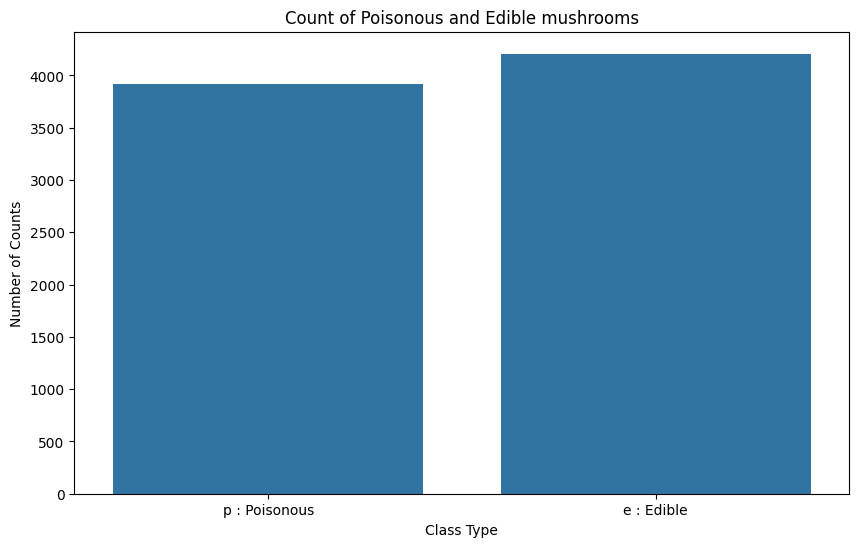

In [20]:
# let's visualize the target column 'class'
plt.figure(figsize=(10,6))
mushroom_class = sns.countplot(x='class',data=mushroom)
plt.xlabel('Class Type')
plt.ylabel('Number of Counts')
mushroom_class.set_xticklabels(['p : Poisonous','e : Edible'])
plt.title('Count of Poisonous and Edible mushrooms')
plt.show()

In [21]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.express as px

In [23]:
# Create a DataFrame for visualization
mushroom_visualization = mushroom['class'].value_counts().reset_index()
mushroom_visualization.columns = ['Class', 'Count']

# Map 'p' to 'Poisonous' and 'e' to 'Edible'
mushroom_visualization['Class'] = mushroom_visualization['Class'].map({'p': 'Poisonous', 'e': 'Edible'})

# Plot the count of Poisonous and Edible mushrooms using Plotly
fig = px.bar(mushroom_visualization, x='Class', y='Count', text='Count', color='Class', 
             labels={'Count': 'Number of Counts', 'Class': 'Class Type'},
             title='Count of Poisonous and Edible mushrooms')

# Show the plot
fig.show()


From above countplot we can see that the class type 'poisonous' has 3916 counts and 'edible' has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.

In [26]:
# Let's check count of classes present in 'cap-surface' column
CapSurface = mushroom['cap-surface'].value_counts()
CapSurface

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [27]:
# Let's see each type with the counts of target class column
mushroom.groupby('cap-surface')['class'].value_counts()


cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/660833298.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



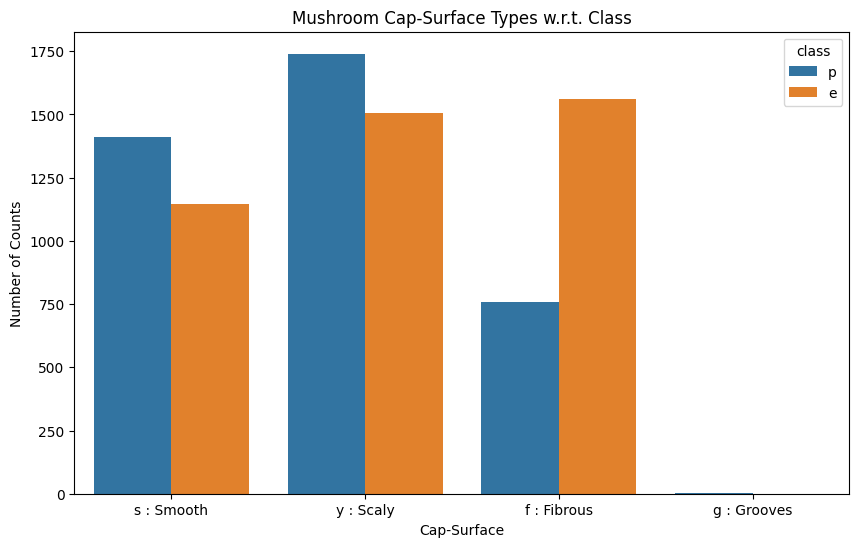

In [28]:
# Let's visualize the feature column 'cap-surface' w.r.t. target column 'class'
plt.figure(figsize=(10,6))
cap_surface = sns.countplot(x='cap-surface',data=mushroom,hue='class')
plt.xlabel('Cap-Surface')
plt.ylabel('Number of Counts')
cap_surface.set_xticklabels(['s : Smooth','y : Scaly','f : Fibrous','g : Grooves'])
plt.title('Mushroom Cap-Surface Types w.r.t. Class')
plt.show()


In [29]:
# using Plotly
import plotly.express as px

# Group by 'cap-surface' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['cap-surface', 'class']).size().reset_index(name='count')

# Map 'cap-surface' values to meaningful labels
cap_surface_labels = {'s': 'Smooth', 'y': 'Scaly', 'f': 'Fibrous', 'g': 'Grooves'}
mushroom_visualization['cap-surface'] = mushroom_visualization['cap-surface'].map(cap_surface_labels)

# Plot the count of cap-surface types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='cap-surface', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'cap-surface': 'Cap-Surface', 'class': 'Class'},
             title='Mushroom Cap-Surface Types w.r.t. Class')

# Show the plot
fig.show()


From above analysis, we can say that there are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.

In [30]:
# Let's check count of classes present in 'bruises' column
mushroom['bruises'].value_counts()

bruises
f    4748
t    3376
Name: count, dtype: int64

In [31]:
# Let's see each type with the counts of target class column
mushroom.groupby(['bruises'])['class'].value_counts()


bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/192582979.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



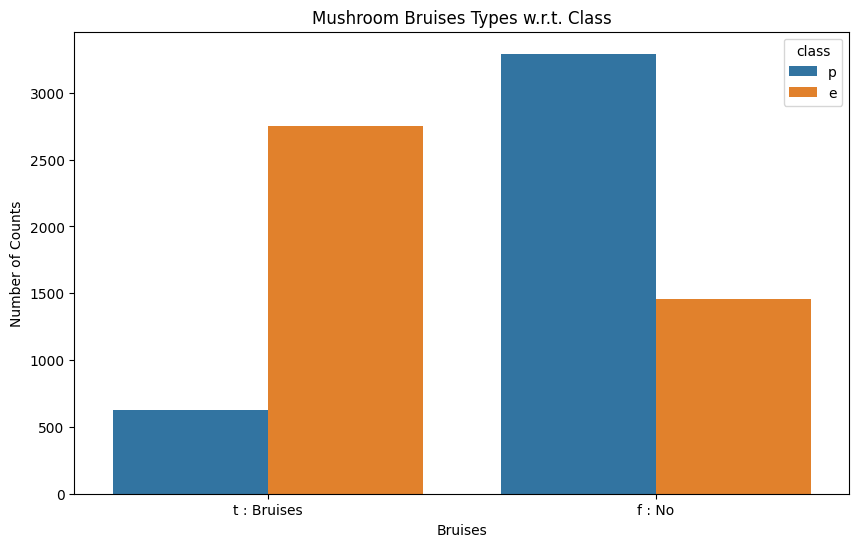

In [32]:
# Let's visualize the feature column 'bruises' w.r.t. target column 'class'
plt.figure(figsize=(10,6))
bruises = sns.countplot(x='bruises',data=mushroom,hue='class')
plt.xlabel('Bruises')
plt.ylabel('Number of Counts')
bruises.set_xticklabels(['t : Bruises', 'f : No'])
plt.title('Mushroom Bruises Types w.r.t. Class')
plt.show()

In [33]:
# using Plotly
import plotly.express as px

# Group by 'bruises' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['bruises', 'class']).size().reset_index(name='Count')

# Create a bar chart using Plotly
fig = px.bar(mushroom_visualization, x='bruises', y='Count', color='class', barmode='group',
             labels={'Count': 'Number of Counts', 'bruises': 'Bruises', 'class': 'Class'},
             title='Mushroom Bruises Types w.r.t. Class')

# Display the bar chart
fig.show()


From above analysis, we can say that mushroom may or may not have bruises but still it could be poisonous or edible according to our data.

In [34]:
# Let's check count of classes present in 'gill-spacing' column
GillSpacing = mushroom['gill-spacing'].value_counts()
GillSpacing


gill-spacing
c    6812
w    1312
Name: count, dtype: int64

In [35]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-spacing'])['class'].value_counts()


gill-spacing  class
c             p        3804
              e        3008
w             e        1200
              p         112
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/3403562161.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



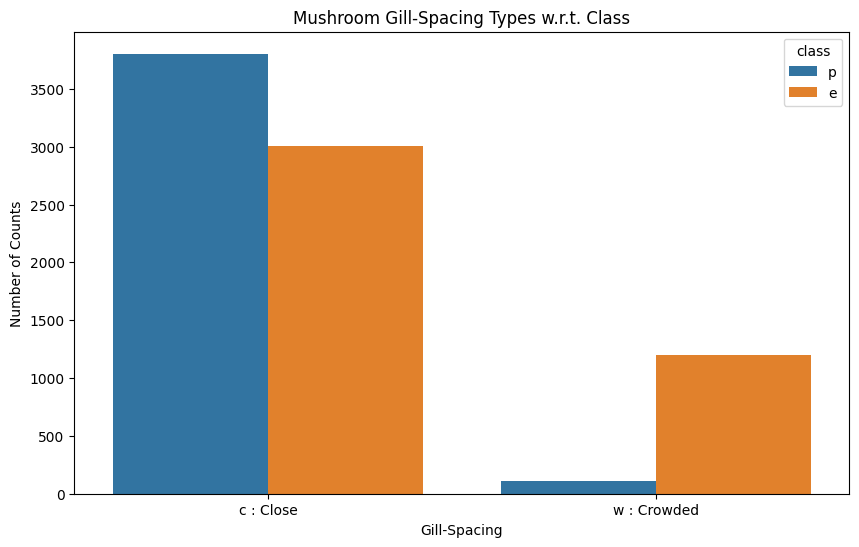

In [36]:
# Let's visualize the feature column 'gill-spacing' w.r.t. target column 'class'
plt.figure(figsize=(10,6))
gill_spacing = sns.countplot(x='gill-spacing',data=mushroom,hue='class')
plt.xlabel('Gill-Spacing')
plt.ylabel('Number of Counts')
gill_spacing.set_xticklabels(['c : Close', 'w : Crowded'])
plt.title('Mushroom Gill-Spacing Types w.r.t. Class')
plt.show()

In [41]:
# using plotly
# Group by 'gill-spacing' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['gill-spacing', 'class']).size().reset_index(name='count')

# Map 'gill-spacing' values to meaningful labels
gill_spacing_labels = {'c': 'Close', 'w': 'Crowded'}
mushroom_visualization['gill-spacing'] = mushroom_visualization['gill-spacing'].map(gill_spacing_labels)

# Plot the count of gill-spacing types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='gill-spacing', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'gill-spacing': 'Gill-Spacing', 'class': 'Class'},
             title='Mushroom Gill-Spacing Types w.r.t. Class')

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)',
                   paper_bgcolor='rgba(0,0,0,0)',
                   font_color='#ffffff')
fig.show()


From above analysis, we can say that mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.

In [42]:
# Let's check count of classes present in 'gill-size' column
GillSize = mushroom['gill-size'].value_counts()
GillSize

gill-size
b    5612
n    2512
Name: count, dtype: int64

In [43]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-size'])['class'].value_counts()

gill-size  class
b          e        3920
           p        1692
n          p        2224
           e         288
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/1342704807.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



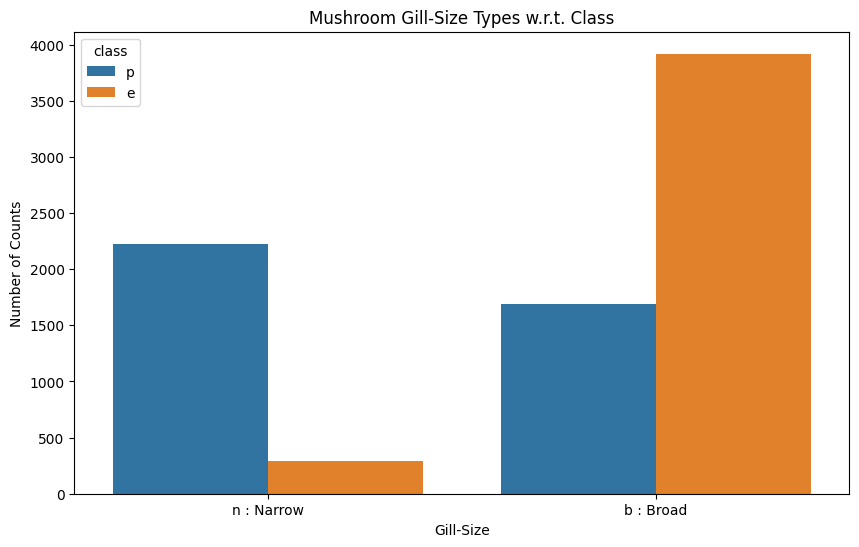

In [44]:
# Let's visualize the feature column 'gill-size' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
gill_size = sns.countplot(x='gill-size',data=mushroom,hue='class')
plt.xlabel('Gill-Size')
plt.ylabel('Number of Counts')
gill_size.set_xticklabels(['n : Narrow', 'b : Broad'])
plt.title('Mushroom Gill-Size Types w.r.t. Class')
plt.show()


In [45]:
# using plotly
import plotly.express as px

# Group by 'gill-size' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['gill-size', 'class']).size().reset_index(name='count')

# Map 'gill-size' values to meaningful labels
gill_size_labels = {'n': 'Narrow', 'b': 'Broad'}
mushroom_visualization['gill-size'] = mushroom_visualization['gill-size'].map(gill_size_labels)

# Plot the count of gill-size types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='gill-size', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'gill-size': 'Gill-Size', 'class': 'Class'},
             title='Mushroom Gill-Size Types w.r.t. Class')

# Show the plot
fig.show()



From above analysis, we can say that mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.

In [46]:

# Let's check count of classes present in 'gill-color' column
GillColor = mushroom['gill-color'].value_counts()
GillColor

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [47]:
# Let's see each type with the counts of target class column
mushroom.groupby(['gill-color'])['class'].value_counts()

gill-color  class
b           p        1728
e           e          96
g           p         504
            e         248
h           p         528
            e         204
k           e         344
            p          64
n           e         936
            p         112
o           e          64
p           e         852
            p         640
r           p          24
u           e         444
            p          48
w           e         956
            p         246
y           e          64
            p          22
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/988690737.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



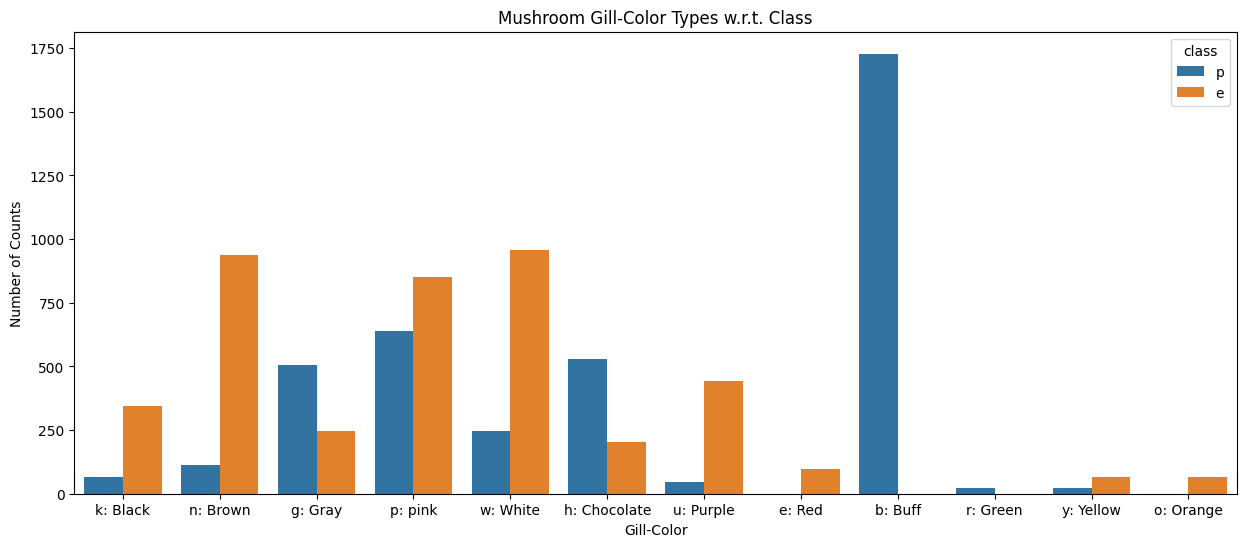

In [48]:

# Let's visualize the feature column 'gill-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
gill_color = sns.countplot(x='gill-color',data=mushroom,hue='class')
plt.xlabel('Gill-Color')
plt.ylabel('Number of Counts')
gill_color.set_xticklabels(['k: Black', 'n: Brown', 'g: Gray', 'p: pink', 'w: White', 
                           'h: Chocolate', 'u: Purple', 'e: Red', 'b: Buff', 'r: Green', 
                           'y: Yellow', 'o: Orange'])
plt.title('Mushroom Gill-Color Types w.r.t. Class')
plt.show()

In [51]:
# using plotly
import plotly.express as px

# Map 'gill-color' values to meaningful labels
gill_color_labels = {'k': 'Black', 'n': 'Brown', 'g': 'Gray', 'p': 'Pink', 'w': 'White', 
                     'h': 'Chocolate', 'u': 'Purple', 'e': 'Red', 'b': 'Buff', 'r': 'Green', 
                     'y': 'Yellow', 'o': 'Orange'}

# Replace 'gill-color' values with their corresponding labels
mushroom['gill-color'] = mushroom['gill-color'].map(gill_color_labels)

# Group by 'gill-color' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['gill-color', 'class']).size().reset_index(name='count')

# Plot the count of gill-color types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='gill-color', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'gill-color': 'Gill-Color', 'class': 'Class'},
             title='Mushroom Gill-Color Types w.r.t. Class')

# Show the plot
fig.show()




From above analysis, we can say that 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.

In [52]:
# Let's check count of classes present in 'stalk-root' column
StalkRoot = mushroom['stalk-root'].value_counts()
StalkRoot

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

In [53]:

# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-root'])['class'].value_counts()

stalk-root  class
b           p        3616
            e        2640
c           e         512
            p          44
e           e         864
            p         256
r           e         192
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/1664197470.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



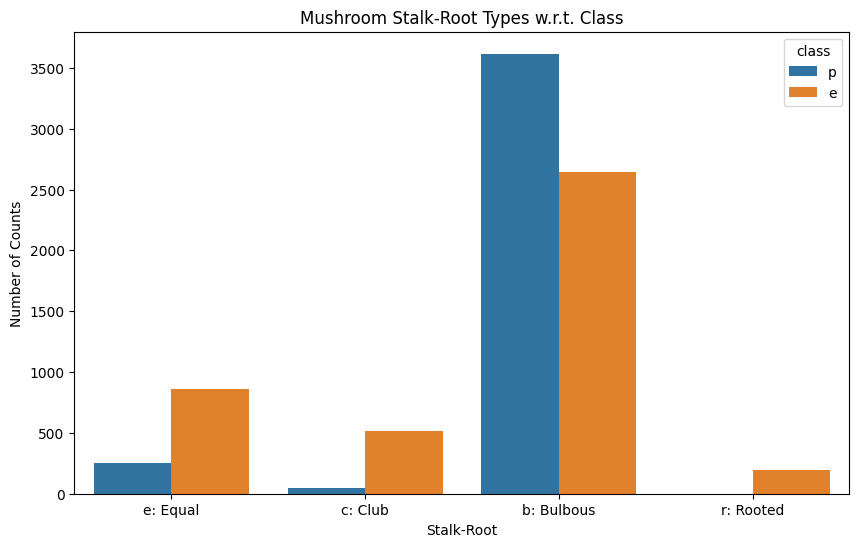

In [54]:
# Let's visualize the feature column 'stalk-root' w.r.t. target column 'class'
plt.figure(figsize=(10,6))
stalk_root = sns.countplot(x='stalk-root',data=mushroom,hue='class')
plt.xlabel('Stalk-Root')
plt.ylabel('Number of Counts')
stalk_root.set_xticklabels(['e: Equal', 'c: Club', 'b: Bulbous', 'r: Rooted'])
plt.title('Mushroom Stalk-Root Types w.r.t. Class')
plt.show()


In [55]:
# using plotly
import plotly.express as px

# Map 'stalk-root' values to meaningful labels
stalk_root_labels = {'e': 'Equal', 'c': 'Club', 'b': 'Bulbous', 'r': 'Rooted'}

# Replace 'stalk-root' values with their corresponding labels
mushroom['stalk-root'] = mushroom['stalk-root'].map(stalk_root_labels)

# Group by 'stalk-root' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['stalk-root', 'class']).size().reset_index(name='count')

# Plot the count of stalk-root types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='stalk-root', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'stalk-root': 'Stalk-Root', 'class': 'Class'},
             title='Mushroom Stalk-Root Types w.r.t. Class')

# Show the plot
fig.show()



From above analysis, we can say that 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data

In [56]:
# Let's check count of classes present in 'stalk-surface-above-ring' column
StalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts()
StalkSurfaceAboveRing

stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64

In [57]:
# Let's see each type with the counts of target class column
mushroom.groupby(['stalk-surface-above-ring'])['class'].value_counts()

stalk-surface-above-ring  class
f                         e         408
                          p         144
k                         p        2228
                          e         144
s                         e        3640
                          p        1536
y                         e          16
                          p           8
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/2267662687.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



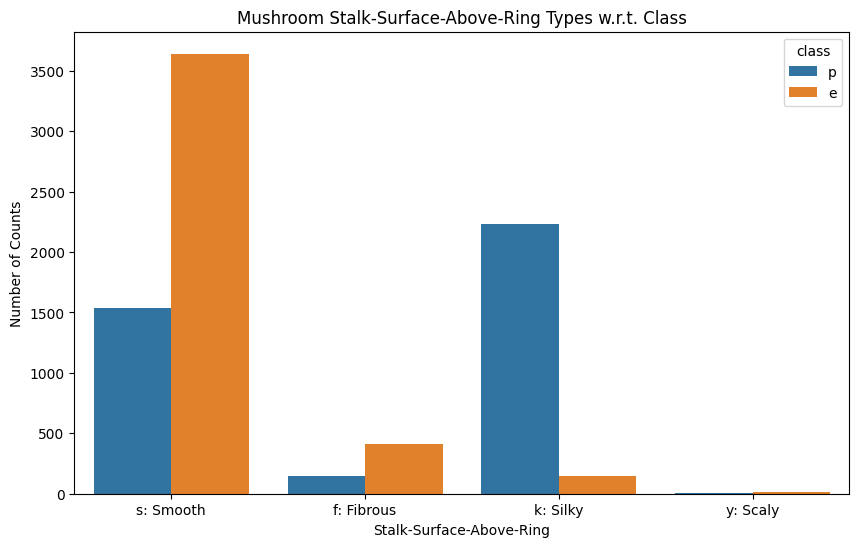

In [58]:
# Let's visualize the feature column 'stalk-surface-above-ring' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
stalk_surface_above_ring = sns.countplot(x='stalk-surface-above-ring',data=mushroom,hue='class')
plt.xlabel('Stalk-Surface-Above-Ring')
plt.ylabel('Number of Counts')
stalk_surface_above_ring.set_xticklabels(['s: Smooth', 'f: Fibrous', 'k: Silky', 'y: Scaly'])
plt.title('Mushroom Stalk-Surface-Above-Ring Types w.r.t. Class')
plt.show()

In [59]:
# using plotly

import plotly.express as px

# Map 'stalk-surface-above-ring' values to meaningful labels
stalk_surface_above_ring_labels = {'s': 'Smooth', 'f': 'Fibrous', 'k': 'Silky', 'y': 'Scaly'}

# Replace 'stalk-surface-above-ring' values with their corresponding labels
mushroom['stalk-surface-above-ring'] = mushroom['stalk-surface-above-ring'].map(stalk_surface_above_ring_labels)

# Group by 'stalk-surface-above-ring' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['stalk-surface-above-ring', 'class']).size().reset_index(name='count')

# Plot the count of stalk-surface-above-ring types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='stalk-surface-above-ring', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'stalk-surface-above-ring': 'Stalk-Surface-Above-Ring', 'class': 'Class'},
             title='Mushroom Stalk-Surface-Above-Ring Types w.r.t. Class')

# Show the plot
fig.show()


From above analysis, we can say that mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.

In [60]:
# Let's check count of classes present in 'ring-type' column
RingType = mushroom['ring-type'].value_counts()
RingType

ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64

In [61]:
# Let's see each type with the counts of target class column
mushroom.groupby(['ring-type'])['class'].value_counts()

ring-type  class
e          p        1768
           e        1008
f          e          48
l          p        1296
n          p          36
p          e        3152
           p         816
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/491565505.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



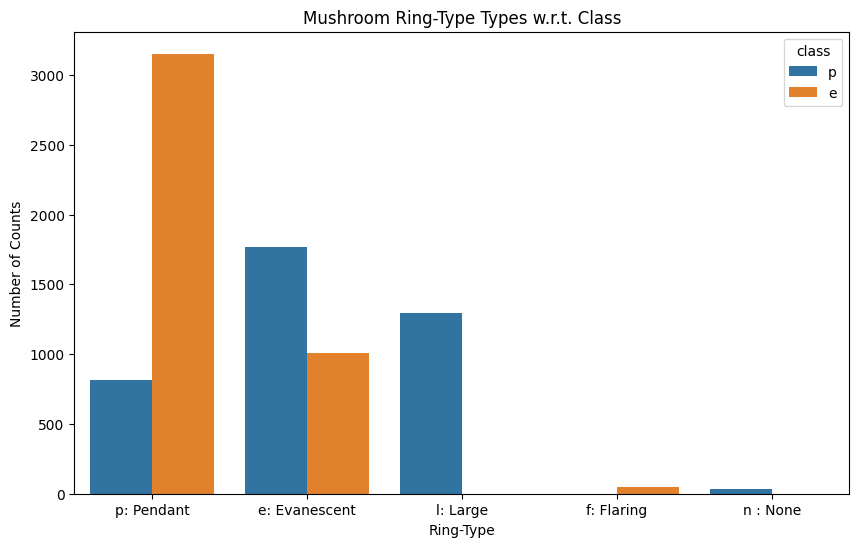

In [62]:
# Let's visualize the feature column 'ring-type' w.r.t. target column 'class'

plt.figure(figsize=(10,6))
ring_type = sns.countplot(x='ring-type',data=mushroom,hue='class')
plt.xlabel('Ring-Type')
plt.ylabel('Number of Counts')
ring_type.set_xticklabels(['p: Pendant', 'e: Evanescent', 'l: Large', 'f: Flaring', 'n : None'])
plt.title('Mushroom Ring-Type Types w.r.t. Class')
plt.show()

In [63]:
# using plotly

import plotly.express as px

# Map 'ring-type' values to meaningful labels
ring_type_labels = {'p': 'Pendant', 'e': 'Evanescent', 'l': 'Large', 'f': 'Flaring', 'n': 'None'}

# Replace 'ring-type' values with their corresponding labels
mushroom['ring-type'] = mushroom['ring-type'].map(ring_type_labels)

# Group by 'ring-type' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['ring-type', 'class']).size().reset_index(name='count')

# Plot the count of ring-type types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='ring-type', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'ring-type': 'Ring-Type', 'class': 'Class'},
             title='Mushroom Ring-Type Types w.r.t. Class')

# Show the plot
fig.show()


From above analysis, we can say that 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.

In [64]:
# Let's check count of classes present in 'spore-print-color' column
SporePrintColor = mushroom['spore-print-color'].value_counts()
SporePrintColor

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [65]:
# Let's see each type with the counts of target class column
mushroom.groupby(['spore-print-color'])['class'].value_counts()

spore-print-color  class
b                  e          48
h                  p        1584
                   e          48
k                  e        1648
                   p         224
n                  e        1744
                   p         224
o                  e          48
r                  p          72
u                  e          48
w                  p        1812
                   e         576
y                  e          48
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/2864229442.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



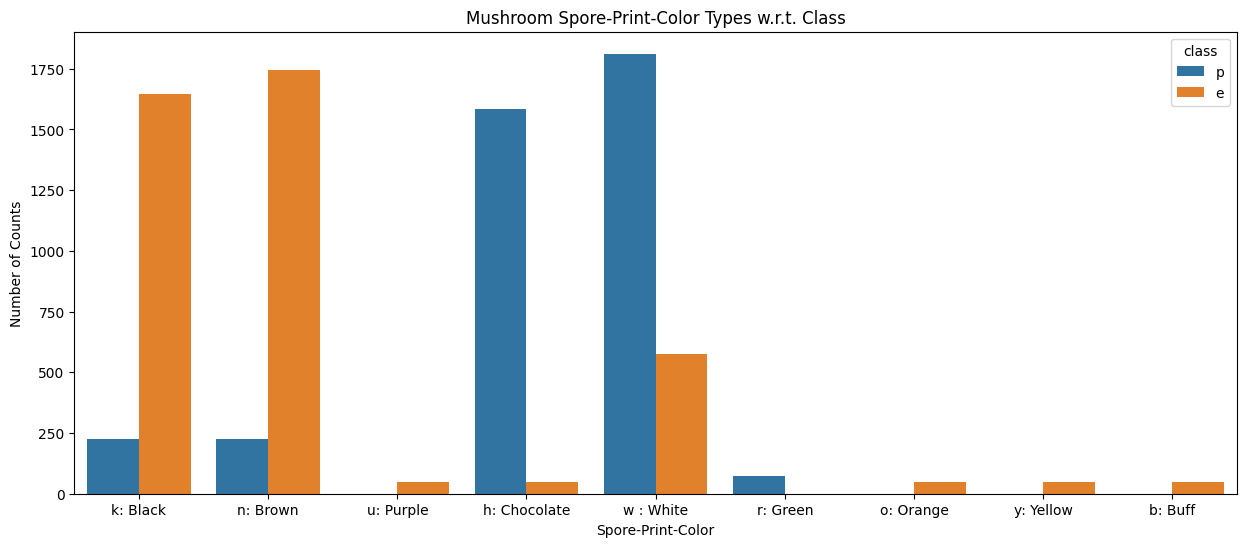

In [66]:
# Let's visualize the feature column 'spore-print-color' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
spore_print_color = sns.countplot(x='spore-print-color',data=mushroom,hue='class')
plt.xlabel('Spore-Print-Color')
plt.ylabel('Number of Counts')
spore_print_color.set_xticklabels(['k: Black', 'n: Brown', 'u: Purple', 'h: Chocolate', 'w : White', 
                                  'r: Green', 'o: Orange', 'y: Yellow', 'b: Buff'])
plt.title('Mushroom Spore-Print-Color Types w.r.t. Class')
plt.show()

In [67]:
# using plotly
import plotly.express as px

# Map 'spore-print-color' values to meaningful labels
spore_print_color_labels = {'k': 'Black', 'n': 'Brown', 'u': 'Purple', 'h': 'Chocolate', 'w': 'White', 
                            'r': 'Green', 'o': 'Orange', 'y': 'Yellow', 'b': 'Buff'}

# Replace 'spore-print-color' values with their corresponding labels
mushroom['spore-print-color'] = mushroom['spore-print-color'].map(spore_print_color_labels)

# Group by 'spore-print-color' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['spore-print-color', 'class']).size().reset_index(name='count')

# Plot the count of spore-print-color types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='spore-print-color', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'spore-print-color': 'Spore-Print-Color', 'class': 'Class'},
             title='Mushroom Spore-Print-Color Types w.r.t. Class')

# Show the plot
fig.show()


In [68]:
# Let's check count of classes present in 'population' column
Population = mushroom['population'].value_counts()
Population

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64

In [69]:
# Let's see each type with the counts of target class column
mushroom.groupby(['population'])['class'].value_counts()

population  class
a           e         384
c           e         288
            p          52
n           e         400
s           e         880
            p         368
v           p        2848
            e        1192
y           e        1064
            p         648
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/2100712804.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



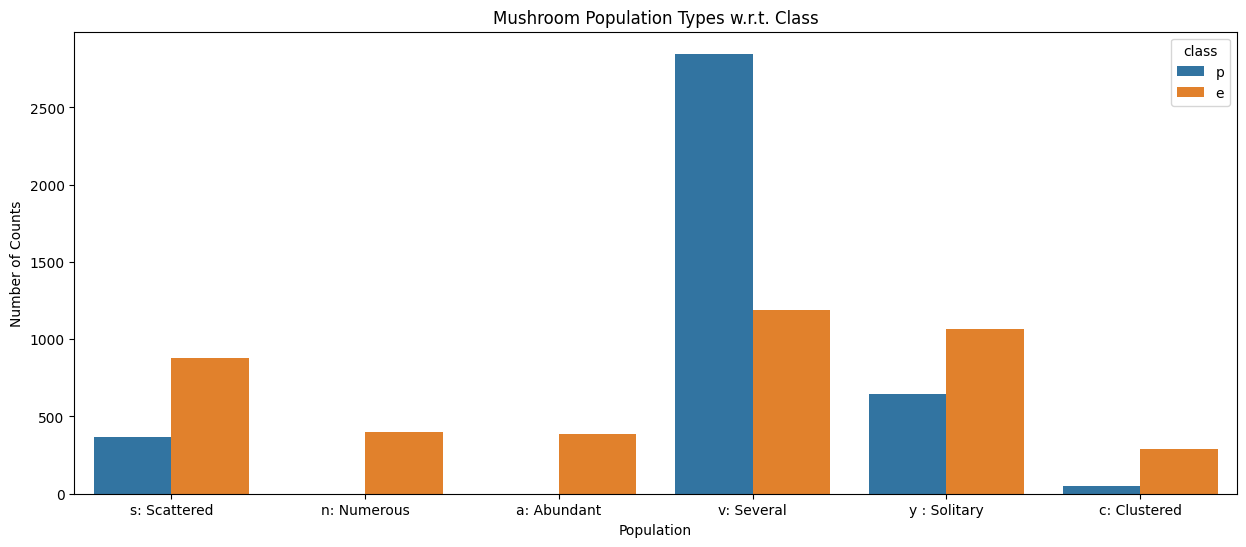

In [70]:
# Let's visualize the feature column 'population' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
population = sns.countplot(x='population',data=mushroom,hue='class')
plt.xlabel('Population')
plt.ylabel('Number of Counts')
population.set_xticklabels(['s: Scattered', 'n: Numerous', 'a: Abundant', 'v: Several', 'y : Solitary', 'c: Clustered'])
plt.title('Mushroom Population Types w.r.t. Class')
plt.show()

In [71]:
import plotly.express as px

# Map 'population' values to meaningful labels
population_labels = {'s': 'Scattered', 'n': 'Numerous', 'a': 'Abundant', 'v': 'Several', 'y': 'Solitary', 'c': 'Clustered'}

# Replace 'population' values with their corresponding labels
mushroom['population'] = mushroom['population'].map(population_labels)

# Group by 'population' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['population', 'class']).size().reset_index(name='count')

# Plot the count of population types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='population', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'population': 'Population', 'class': 'Class'},
             title='Mushroom Population Types w.r.t. Class')

# Show the plot
fig.show()


From above analysis, we can say that 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.

In [72]:
# Let's check count of classes present in 'habitat' column
Habitat = mushroom['habitat'].value_counts()
Habitat

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64

In [73]:
# Let's see each type with the counts of target class column
mushroom.groupby(['habitat'])['class'].value_counts()

habitat  class
d        e        1880
         p        1268
g        e        1408
         p         740
l        p         592
         e         240
m        e         256
         p          36
p        p        1008
         e         136
u        p         272
         e          96
w        e         192
Name: count, dtype: int64

/var/folders/m1/m54k9pbj7hbcvckx27dplr840000gn/T/ipykernel_2810/2630728419.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



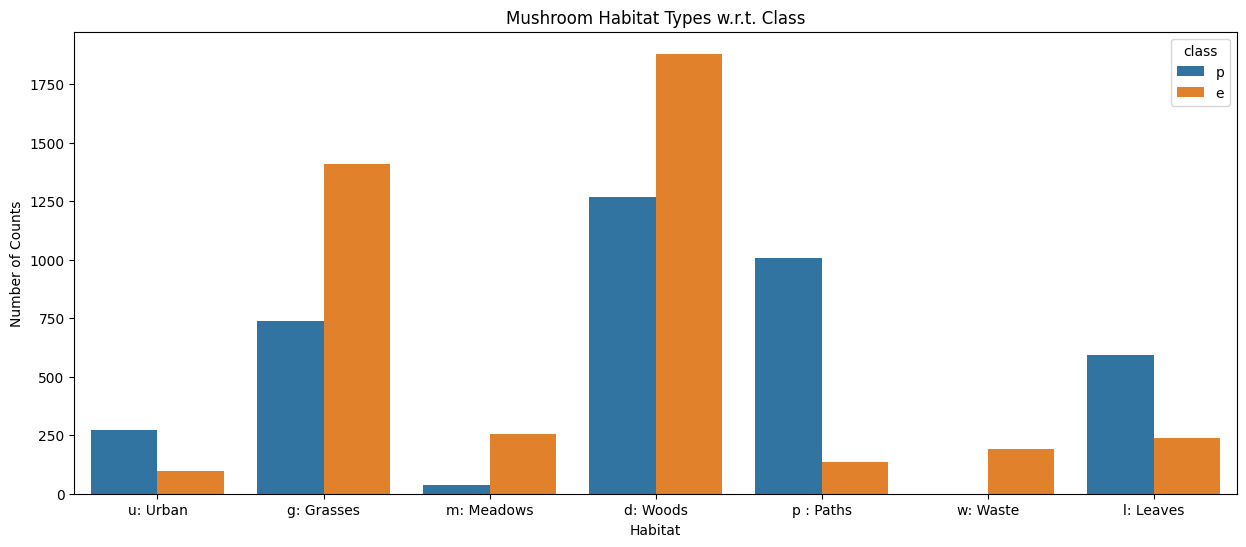

In [74]:
# Let's visualize the feature column 'habitat' w.r.t. target column 'class'

plt.figure(figsize=(15,6))
habitat = sns.countplot(x='habitat',data=mushroom,hue='class')
plt.xlabel('Habitat')
plt.ylabel('Number of Counts')
habitat.set_xticklabels(['u: Urban', 'g: Grasses', 'm: Meadows', 'd: Woods', 'p : Paths', 'w: Waste', 'l: Leaves'])
plt.title('Mushroom Habitat Types w.r.t. Class')
plt.show()

In [75]:
# using plotly
import plotly.express as px

# Map 'habitat' values to meaningful labels
habitat_labels = {'u': 'Urban', 'g': 'Grasses', 'm': 'Meadows', 'd': 'Woods', 'p': 'Paths', 'w': 'Waste', 'l': 'Leaves'}

# Replace 'habitat' values with their corresponding labels
mushroom['habitat'] = mushroom['habitat'].map(habitat_labels)

# Group by 'habitat' and 'class' and count the occurrences
mushroom_visualization = mushroom.groupby(['habitat', 'class']).size().reset_index(name='count')

# Plot the count of habitat types with respect to class using Plotly
fig = px.bar(mushroom_visualization, x='habitat', y='count', color='class', barmode='group',
             labels={'count': 'Number of Counts', 'habitat': 'Habitat', 'class': 'Class'},
             title='Mushroom Habitat Types w.r.t. Class')

# Show the plot
fig.show()



From above analysis, we can say that 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.

# Data Preprocessing


In [76]:
# First we will map our target column to 0 and 1 values 
mushroom['class'] = mushroom['class'].map({'e': 0, 'p': 1})

In [77]:
mushroom['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

Now we will split our data into independent features - X and dependent target - y.



In [78]:
X = mushroom.drop(['class'],axis=1) # independent features
y = mushroom['class'] # target 

Since our data is of categorical type we will use LabelEncoder to convert it into numerical.



In [79]:
# create an instance of label encoder 
le = LabelEncoder()

In [80]:
# using label encoder to transform independent features
X = X.apply(le.fit_transform)

In [82]:
# Let's take a look at our data
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,0,0,...,3,2,7,7,2,1,4,0,3,4
1,5,2,9,1,0,1,0,0,0,0,...,3,2,7,7,2,1,4,1,2,0
2,0,2,8,1,3,1,0,0,1,0,...,3,2,7,7,2,1,4,1,2,2
3,5,3,8,1,6,1,0,1,1,0,...,3,2,7,7,2,1,4,0,3,4
4,5,2,3,0,5,1,1,0,0,1,...,3,2,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,3,2,5,5,1,1,4,2,1,1
8120,5,2,4,0,5,0,0,0,11,0,...,3,2,5,5,0,1,4,2,4,1
8121,2,2,4,0,5,0,0,0,1,0,...,3,2,5,5,1,1,4,2,1,1
8122,3,3,4,0,8,1,0,1,2,1,...,3,1,7,7,2,1,0,7,4,1


Now we will split our data into train and test set

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Now we will use feature selection to find out best features to use for our model. For this purpose we will use SelectKBest method with score_func as chi2

In [84]:
fs = SelectKBest(score_func=chi2, k ='all')

In [85]:
# fitting train and test data
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7f83867e9510>)

Feature 0: 9.263320
Feature 1: 160.254363
Feature 2: 5.897075
Feature 3: 919.925332
Feature 4: 65.961427
Feature 5: 2.420369
Feature 6: 601.552552
Feature 7: 1261.698364
Feature 8: 1054.964759
Feature 9: 28.658561
Feature 10: 1032.181093
Feature 11: 72.455717
Feature 12: 155.900921
Feature 13: 88.828475
Feature 14: 84.771468
Feature 15: 3.888454
Feature 16: 19.772966
Feature 17: 1445.464235
Feature 18: 4327.476688
Feature 19: 237.485196
Feature 20: 13.963405


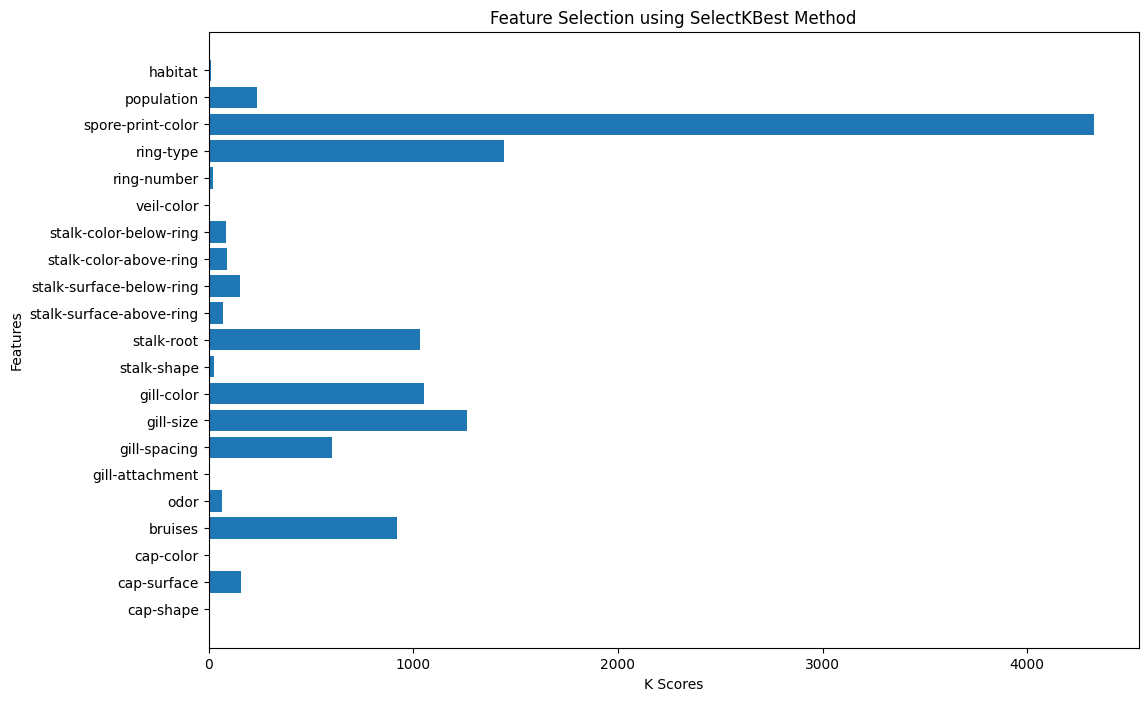

In [86]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 8))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.ylabel('Features')
plt.xlabel('K Scores')
plt.yticks(ticks=range(0,21), labels=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
            'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
            'population', 'habitat'])
plt.title('Feature Selection using SelectKBest Method')
plt.show()

In [88]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

After carefully analyzing above figure, we can now drop columns which are not necessary for our calculation.

In [89]:
X_train_new = X_train.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [90]:
# check dimensions of new train data
X_train_new.shape

(6093, 12)

In [91]:
# show first 5 records
X_train_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
3887,2,0,0,1,1,0,3,2,4,1,3,6
4119,0,0,0,0,3,0,2,1,2,3,4,0
1600,3,1,0,0,1,0,3,2,4,0,5,6
4988,3,0,0,0,7,0,2,1,2,3,5,3
6757,3,0,0,1,2,0,3,1,0,7,4,6


In [92]:
# drop unnecessary columns from test data also
X_test_new = X_test.drop(['cap-shape', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 
                           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
                           'ring-number'], axis=1)

In [93]:
# check dimensions of new test data
X_test_new.shape

(2031, 12)

In [94]:

# show first 5 records
X_test_new.head()

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
1971,0,0,1,0,3,2,3,0,0,1,3,0
6654,2,0,0,1,2,0,3,2,0,7,4,1
5606,3,0,0,1,2,0,2,2,0,7,4,1
3332,3,1,0,0,1,0,3,2,4,1,5,6
6988,2,0,0,1,2,0,3,2,0,7,4,1


Now we will scale our data for model training using Standard Scaler



In [95]:
# create an instance of Standard Scaler
SS = StandardScaler()

In [96]:
# applying transformation on train data
X_train_scaled = pd.DataFrame(SS.fit_transform(X_train_new),columns=X_train_new.columns)


In [97]:

# Let's see how our data looks
X_train_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,0.138035,-0.844940,-0.438864,1.506246,-1.116124,-0.506699,0.616661,0.587742,0.952434,-0.730219,-0.511106,1.097393
1,-1.487180,-0.844940,-0.438864,-0.663902,-0.521151,-0.506699,-0.610017,-0.889614,-0.156313,-0.022476,0.281707,-1.269899
2,0.950643,1.183516,-0.438864,-0.663902,-1.116124,-0.506699,0.616661,0.587742,0.952434,-1.084091,1.074519,1.097393
3,0.950643,-0.844940,-0.438864,-0.663902,0.668796,-0.506699,-0.610017,-0.889614,-0.156313,-0.022476,1.074519,-0.086253
4,0.950643,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,0.616661,-0.889614,-1.265060,1.393009,0.281707,1.097393
...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0.950643,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,-0.610017,0.587742,-1.265060,1.393009,0.281707,-0.086253
6089,0.950643,1.183516,-0.438864,-0.663902,1.561255,-0.506699,0.616661,0.587742,-1.265060,1.393009,-2.096730,0.702845
6090,0.950643,1.183516,-0.438864,-0.663902,1.561255,3.205505,0.616661,2.065097,0.952434,-0.730219,1.074519,-0.086253
6091,0.138035,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,0.616661,0.587742,-1.265060,1.393009,0.281707,-0.086253


In [98]:
# applying the same transformations on test data
X_test_scaled = pd.DataFrame(SS.transform(X_test_new),columns=X_test_new.columns)

In [99]:
# let's see how our data looks
X_test_scaled

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,-1.487180,-0.844940,2.278612,-0.663902,-0.521151,1.968104,0.616661,-2.366969,-1.265060,-0.730219,-0.511106,-1.269899
1,0.138035,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,0.616661,0.587742,-1.265060,1.393009,0.281707,-0.875350
2,0.950643,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,-0.610017,0.587742,-1.265060,1.393009,0.281707,-0.875350
3,0.950643,1.183516,-0.438864,-0.663902,-1.116124,-0.506699,0.616661,0.587742,0.952434,-0.730219,1.074519,1.097393
4,0.138035,-0.844940,-0.438864,1.506246,-0.818637,-0.506699,0.616661,0.587742,-1.265060,1.393009,0.281707,-0.875350
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,0.950643,1.183516,-0.438864,-0.663902,1.561255,-0.506699,0.616661,0.587742,0.952434,-0.730219,0.281707,1.097393
2027,0.138035,1.183516,-0.438864,-0.663902,0.668796,-0.506699,0.616661,0.587742,0.952434,-0.022476,-0.511106,0.308296
2028,0.138035,1.183516,-0.438864,-0.663902,-1.413611,0.730702,0.616661,0.587742,0.952434,-1.084091,-0.511106,-1.269899
2029,-1.487180,-0.844940,2.278612,-0.663902,1.561255,-0.506699,-0.610017,0.587742,0.952434,1.393009,-1.303918,-1.269899


# Applying PCA

In [102]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components=7)
pca_fit=pca.fit_transform(X_train_scaled)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.28106638 0.2139877  0.11455566 0.08145116 0.07577572 0.0519403
 0.04718781]
0.8659647220442007


# Model Training


In [107]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
svm = SVC()
svm.fit(X_train_scaled,y_train)
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Prediction of test Data


In [109]:
y_predict1= lr.predict(X_test_scaled)
y_predict2= knn.predict(X_test_scaled)
y_predict3= svm.predict(X_test_scaled)
y_predict4= rf.predict(X_test_scaled)
y_predict5= dt.predict(X_test_scaled)
y_predict6= gb.predict(X_test_scaled)
y_predict7= xgb.predict(X_test_scaled)

# print(accuracy_score(y_test,y_predict1))
# print(accuracy_score(y_test,y_predict2))
# print(accuracy_score(y_test,y_predict3))
# print(accuracy_score(y_test,y_predict4))
# print(accuracy_score(y_test,y_predict5))
# print(accuracy_score(y_test,y_predict6))
# print(accuracy_score(y_test,y_predict7))


# Finding accuracy score by evaluating algorithm

In [110]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_predict1))
print("Accuracy of KNN",accuracy_score(y_test,y_predict2))
print("Accuracy of SVM",accuracy_score(y_test,y_predict3))
print("Accuracy of Random Forest",accuracy_score(y_test,y_predict4))
print("Accuracy of Decision Tree",accuracy_score(y_test,y_predict5))
print("Accuracy of Gradient Boosting",accuracy_score(y_test,y_predict6))
print("Accuracy of XGBoost",accuracy_score(y_test,y_predict7))


Accuracy of Logistic Regression 0.9374692269817824
Accuracy of KNN 1.0
Accuracy of SVM 1.0
Accuracy of Random Forest 1.0
Accuracy of Decision Tree 1.0
Accuracy of Gradient Boosting 1.0
Accuracy of XGBoost 1.0


In [111]:
Predicted=pd.DataFrame({'Models':['Logistic Regression','KNeighbors','SVC','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
              'Accuracy Score':[accuracy_score(y_test,y_predict1)*100,
                                accuracy_score(y_test,y_predict2)*100,
                                accuracy_score(y_test,y_predict3)*100,
                                accuracy_score(y_test,y_predict4)*100,
                                accuracy_score(y_test,y_predict5)*100,
                                accuracy_score(y_test,y_predict6)*100,
                                accuracy_score(y_test,y_predict7)*100
                                
                                ]})

In [112]:
Predicted

,Models,Accuracy Score
0,Logistic Regression,93.746923
1,KNeighbors,100.000000
2,SVC,100.000000
3,Decision Tree,100.000000
4,Random Forest,100.000000
5,Gradient Boosting,100.000000
6,XGBoost,100.000000


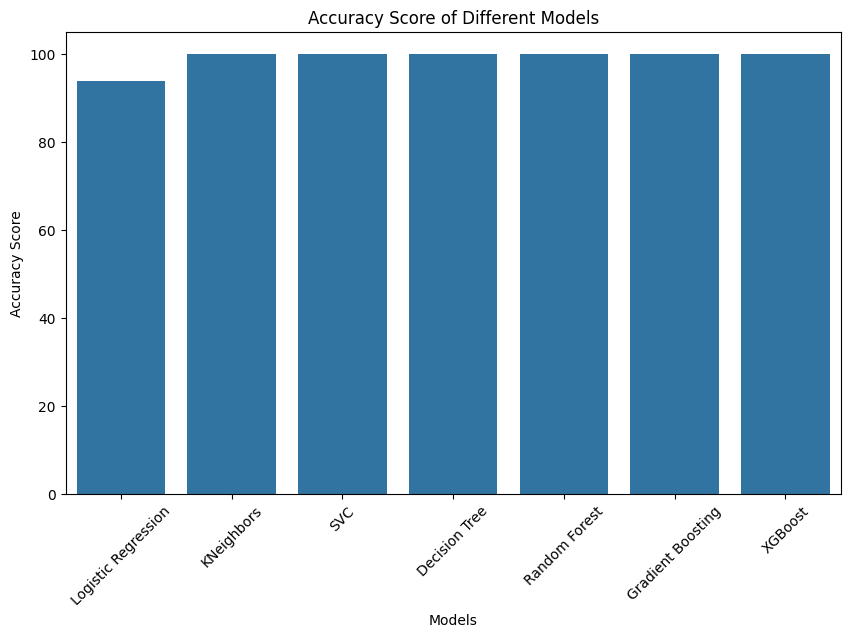

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Predicted is a DataFrame containing 'Models' and 'Accuracy Score' columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x=Predicted['Models'], y=Predicted['Accuracy Score'])

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


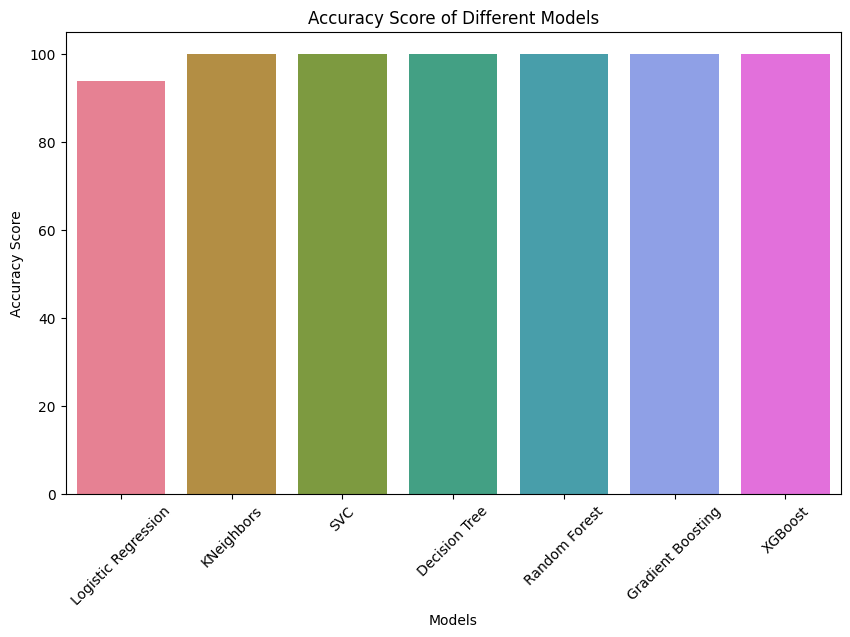

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Predicted is a DataFrame containing 'Models' and 'Accuracy Score' columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color palette
colors = sns.color_palette("husl", len(Predicted))

# Create the bar plot with the specified color palette
sns.barplot(x='Models', y='Accuracy Score', data=Predicted, hue='Models', palette=colors, dodge=False, legend=False)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Model Performance



Now we will check our model performance using Confusion Matrix, Accuracy Score & Classification Report

In [118]:
# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(y_test,y_predict7))

# Accuracy Score
print("Accuracy Score : \n",accuracy_score(y_test,y_predict7))

# Classification Report
print("Classification Report : \n", classification_report(y_test,y_predict7))

Confusion Matrix : 
 [[1040    0]
 [   0  991]]
Accuracy Score : 
 1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031




As you can see from abobe that our model has 100% accuracy on both training data and test data


Now to create our webpage we need to extract values from feature columns so that we can create a drop down for users to select values of features.

In [120]:
X_train_transformed = pd.DataFrame(SS.inverse_transform(X_train_scaled), columns=X_train_scaled.columns)
X_train_transformed

,cap-surface,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,population,habitat
0,2.000000e+00,0.0,0.0,1.0,1.0,5.551115e-17,3.0,2.0,4.0,1.0,3.0,6.0
1,2.220446e-16,0.0,0.0,0.0,3.0,5.551115e-17,2.0,1.0,2.0,3.0,4.0,0.0
2,3.000000e+00,1.0,0.0,0.0,1.0,5.551115e-17,3.0,2.0,4.0,0.0,5.0,6.0
3,3.000000e+00,0.0,0.0,0.0,7.0,5.551115e-17,2.0,1.0,2.0,3.0,5.0,3.0
4,3.000000e+00,0.0,0.0,1.0,2.0,5.551115e-17,3.0,1.0,0.0,7.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6088,3.000000e+00,0.0,0.0,1.0,2.0,5.551115e-17,2.0,2.0,0.0,7.0,4.0,3.0
6089,3.000000e+00,1.0,0.0,0.0,10.0,5.551115e-17,3.0,2.0,0.0,7.0,1.0,5.0
6090,3.000000e+00,1.0,0.0,0.0,10.0,3.000000e+00,3.0,3.0,4.0,1.0,5.0,3.0
6091,2.000000e+00,0.0,0.0,1.0,2.0,5.551115e-17,3.0,2.0,0.0,7.0,4.0,3.0


In [121]:
X_train_transformed['habitat'].value_counts()
habitat = X_train_transformed['habitat'].astype(int)

In [123]:
X_train_original = pd.DataFrame(le.inverse_transform(habitat))
X_train_original.value_counts()


0      
Woods      2365
Grasses    1611
Paths       848
Leaves      638
Urban       256
Meadows     220
Waste       155
Name: count, dtype: int64

In [124]:
x_inv = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)
x_inv['habitat'].value_counts()

habitat
 1.097393    2365
-1.269899    1611
-0.086253     848
-0.875350     638
 0.308296     256
-0.480802     220
 0.702845     155
Name: count, dtype: int64

Now using above data we can input values in our drop down for 'habitat' column and for other features as well.

In [125]:
import pickle
pickle.dump(xgb, open("XGBoost.pkl", "wb"))

#### Summary:
 * The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
 * There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
 * The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
 * The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
 * The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
 * The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
 * The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
 * The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 * The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 * The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
 * The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
 * The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
 * The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.
 * The XGBoost Classifier model has 100% accuracy on both training data and test data.


In [126]:
filename = 'XGBoost.pkl'

In [132]:
loaded_dt1_model=pickle.load(open(filename, 'rb'))